# CH12: Implementing a Multilayer Artificial Neural Network from Scratch

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

## Packages

In [2]:
import os

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from utils import load_mnist

## Single-layer neural network recap

## Introducing the multilayer neural network architecture

## Activating a neural network via forward propagation

## Classifying handwritten digits

In [3]:
minst_data = "../datasets/digits/mnist_scaled.npz"

if os.path.exists(minst_data):
    mnist = np.load(minst_data)
    X_train, y_train, X_test, y_test = [ mnist[f] for f in mnist.files ]
else:    
    X_train, y_train = load_mnist("../datasets/digits/", kind="train")
    X_test, y_test = load_mnist("../datasets/digits/", kind="t10k")
    
    np.savez_compressed(
        minst_data, 
        X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
    )

In [4]:
print("Train - rows: %d, columns: %d" % X_train.shape)
print("Test - rows: %d, columns: %d" % X_test.shape)

Train - rows: 60000, columns: 784
Test - rows: 10000, columns: 784


### Digits visualisation

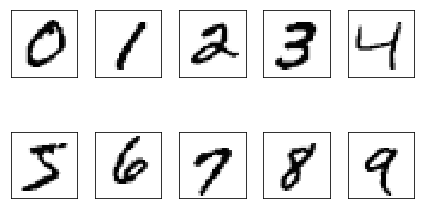

In [5]:
fix, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys")

ax[0].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

## Implementing a multilayer perceptron

In [6]:
from ch12.neuralnet import NeuralNetMLP

In [7]:
nn = NeuralNetMLP(
    n_hidden=10, n_output=10, n_features=28*28, 
    l2=0.01, epochs=200, eta=0.0005, minibatches=600, 
    shuffle=True, random_state=1
)

In [8]:
nn.fit(X=X_train[:55000], y=y_train[:55000], print_progress=True)

Epoch: 200/200

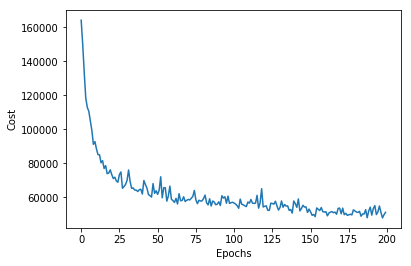

In [9]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.show()

In [15]:
y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)

In [18]:
acc_test = (np.sum(y_test == y_test_pred)).astype(np.float) / X_test.shape[0]
acc_train = (np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0]


print("Test accuracy: %.2f%%" % (acc_test*100))
print("Training accuracy: %.2f%%" % (acc_train*100))

Test accuracy: 84.96%
Training accuracy: 84.86%
